## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

In [2]:
# load data

data = pd.read_csv('..\precleaned-datasets\dataset_2.csv')
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,target,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,5.751633,2.808895,1.244055,11.269688,15.866550,0.00,1.181500e+00,1.903910,4.667888,1.842749,5.863767,0.115498,2.398785,0.139191,11.860244,4.433561,7.135750,2.240605,3.720161,5.805012,1.308222,0.133272,5.514540,11.510708,7.534482,8.779925,6.797556,8.504757,0.188741,8.783980,15.698044,0.035042,1.860657,1.736770,6.443298e-07,9.411215,6.236506,1.82,0.849346,1.629826,12.412388,3.400224,9.329826,0.056875,1.534238,3.976040,14.086948,5.738625,7.161002,1.106342,1,3.756560,0.848060,1.307758,0.500280,14.439678,13.005608,0.938697,1.88,12.866988,11.369994,1.467595,10.043070,8.174325,2.088815,0.134455,1.282842,1.262513,1.114369,1.446358,15.512397,1.820403,0.619730,0.826138,6.880270,1.680353,8.659387,10.184313,7.248146,17.065003,0.0,1.044600,0.176036,9.869159,4.662407e-01,7.273476,0.623398,2.070677,1.108609,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,8.225109,2.001220,8.081647,3.933986,14.350374,0.00,1.244384e+01,1.575456,5.275010,2.750981,3.402345,0.227527,2.502344,0.197449,12.654514,3.895271,9.230702,0.719196,3.393035,6.055243,0.926661,0.221227,7.406060,10.290955,8.075000,10.034637,6.182029,7.698029,0.295115,10.308592,15.140132,0.137162,1.634830,1.124584,1.673459e-02,10.473282,4.432994,0.96,1.350589,1.567088,5.307235,10.541619,4.655548,0.142864,1.154133,2.434253,9.552176,5.335898,4.540389,2.074389,0,1.583407,1.865679,3.401134,0.878958,5.864243,12.998473,1.820000,0.94,10.477765,3.026453,1.338741,16.136215,8.659485,0.567717,0.108499,1.447928,0.583342,4.454525,3.570452,15.988817,2.628892,1.251810,2.077105,7.453729,2.173920,10.357143,13.274292,8.647012,17.143991,0.0,1.161626,0.214995,8.661069,9.585002e-01,6.475936,1.230876,2.249656,0.615216,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,8.307318,3.239122,2.699376,10.030416,14.977220,0.00,7.636780e-07,2.605838,5.459521,3.437779,5.498281,19.800000,2.136717,19.036815,11.938497,4.378310,6.843868,1.745698,3.721307,6.339151,1.479797,18.600001,8.142160,12.575593,6.752941,6.303391,5.327748,7.559745,16.951823,7.701432,14.501621,13.230928,2.812556,1.598376,1.560430e-07,9.387755,9.687344,0.99,0.770143,2.085602,4.166562,6.913110,4.535706,5.019770,1.145594,3.177751,11.022966,5.187055,5.165106,1.346895,0,5.696174,0.868576,1.275738,0.475953,8.245941,14.269387,0.407564,0.92,12.795940,3.158102,2.084452,13.596735,7.136616,3.975333,19.199999,1.035094,1.039650,2.920388,18.194969,13.878539,4.177674,0.265892,0.949150,5.501881,1.545747,6.652942,10.219311,7.350044,15.865534,0.0,0.668244,0.207304,9.591838,1.426163e+00,7.552225,0.599195,1.872145,2.111624,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,5.769939,2.760518,4.067190,14.040960,15.363394,0.94,1.278596e+00,2.447368,4.622004,3.166859,5.746444,0.107650,1.819269,0.143555,12.384151,4.847826,8.501440,1.471080,3.3

In [3]:
# split data

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# set up the Random Forest Classifier model

rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=2)

# set up the selector
sel_ = SelectBySingleFeaturePerformance(estimator=rf, 
                                        scoring='roc_auc', 
                                        cv=3, 
                                        threshold=0.5,
                                        variables=None)

# find predictive features
sel_.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=2,
                                                                  random_state=1),
                                 threshold=0.5,
                                 variables=['var_1', 'var_2', 'var_3', 'var_4',
                                            'var_5', 'var_6', 'var_7', 'var_8',
                                            'var_9', 'var_10', 'var_11',
                                            'var_12', 'var_13', 'var_14',
                                            'var_15', 'var_16', 'var_17',
                                            'var_18', 'var_19', 'var_20',
                                            'var_21', 'var_22', 'var_23',
                                            'var_24', 'var_25', 'var_26',
                                            'var_27', 'var_28', 'var_29',
                                 

In [5]:
# can see the performance for each feature
sel_.feature_performance_

{'var_1': 0.48759804310655247,
 'var_2': 0.5058430962154362,
 'var_3': 0.4905951818514887,
 'var_4': 0.5012818338306464,
 'var_5': 0.5015513117371054,
 'var_6': 0.5002440802669613,
 'var_7': 0.5053979202760539,
 'var_8': 0.5087156558379,
 'var_9': 0.49865040885406,
 'var_10': 0.5039419969093452,
 'var_11': 0.5045182188882853,
 'var_12': 0.5033291095836959,
 'var_13': 0.5012504646468846,
 'var_14': 0.5095389401291234,
 'var_15': 0.5067021926536555,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963259086247375,
 'var_18': 0.5023827934435133,
 'var_19': 0.5014535910384822,
 'var_20': 0.495189161764914,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030833299201597,
 'var_23': 0.5031366379464258,
 'var_24': 0.4987180136881055,
 'var_25': 0.4971810711337201,
 'var_26': 0.49633409413856516,
 'var_27': 0.4977015090168239,
 'var_28': 0.5066147309268304,
 'var_29': 0.503307820654075,
 'var_30': 0.5062983971359932,
 'var_31': 0.49807695901550747,
 'var_32': 0.49568446088788237,
 'var_33': 0.5096555

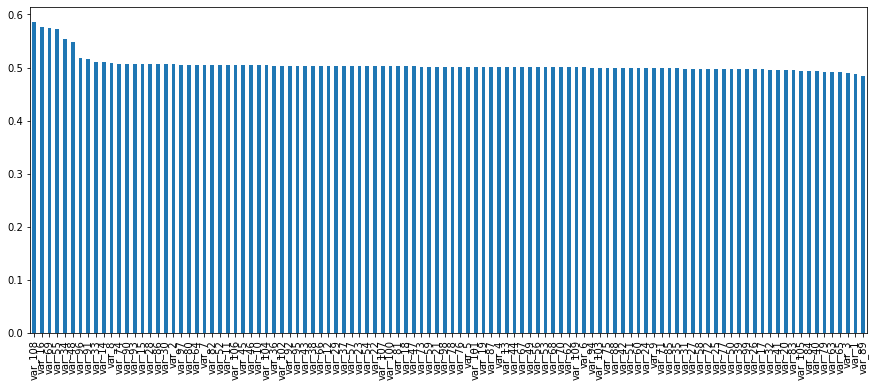

In [6]:
# plotting the feature importance

feats = pd.Series(sel_.feature_performance_)
feats.index = X_train.columns
feats.sort_values(ascending = False).plot.bar(figsize = (15, 6))
plt.show();

- Can see many features have roc_auc scores around 0.5 which means they are kind of not predictive

In [8]:
# features to drop selected by the feature engine
sel_.features_to_drop_

['var_1',
 'var_3',
 'var_9',
 'var_17',
 'var_20',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_31',
 'var_32',
 'var_35',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_50',
 'var_51',
 'var_58',
 'var_60',
 'var_63',
 'var_65',
 'var_71',
 'var_72',
 'var_75',
 'var_77',
 'var_79',
 'var_83',
 'var_84',
 'var_85',
 'var_88',
 'var_89',
 'var_94',
 'var_99',
 'var_103',
 'var_105']

In [9]:
len(sel_.features_to_drop_)

36

In [11]:
# remove non-prective features

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

In [12]:
data = pd.read_csv('house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# fill missing values
data.fillna(0, inplace=True)

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [15]:
#set up the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=1, n_jobs=2)

# set up the selector

sel = SelectBySingleFeaturePerformance(estimator=rf,
                                       scoring='r2',
                                       cv=3,
                                       threshold=0.5,
                                       variables=None)

# get the predictive features
sel.fit(X_train, y_train)


SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=2,
                                                                 n_estimators=10,
                                                                 n_jobs=2,
                                                                 random_state=1),
                                 scoring='r2', threshold=0.5,
                                 variables=['MSSubClass', 'LotFrontage',
                                            'LotArea', 'OverallQual',
                                            'OverallCond', 'YearBuilt',
                                            'YearRemodAdd', 'MasVnrArea',
                                            'BsmtFinSF1', 'BsmtFinSF2',
                                            'BsmtUnfSF', 'TotalBsmtSF',
                                            '1stFlrSF', '2ndFlrSF',
                                            'LowQualFinSF', 'GrLivArea',
                                            'Bs

In [17]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the r2 can be positive or negative.
# the selector selects based on the absolute value

sel.feature_performance_

{'MSSubClass': 0.18514034601982418,
 'LotFrontage': 0.1129543796082455,
 'LotArea': 0.18072827270865235,
 'OverallQual': 0.6390607189504983,
 'OverallCond': 0.1009973243645007,
 'YearBuilt': 0.34969187588528144,
 'YearRemodAdd': 0.2601114121308128,
 'MasVnrArea': 0.16739999652926918,
 'BsmtFinSF1': 0.1989808667134347,
 'BsmtFinSF2': -0.009703547431066087,
 'BsmtUnfSF': 0.058788328278334946,
 'TotalBsmtSF': 0.4067200681744638,
 '1stFlrSF': 0.34510202976681503,
 '2ndFlrSF': 0.21988067672483705,
 'LowQualFinSF': -0.025701997588528352,
 'GrLivArea': 0.47416720514000604,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'FullBath': 0.3300942150720977,
 'HalfBath': 0.0706292027025724,
 'BedroomAbvGr': 0.04170276147375148,
 'KitchenAbvGr': 0.0013083175726592937,
 'TotRmsAbvGrd': 0.2638005756723682,
 'Fireplaces': 0.22352442100930425,
 'GarageYrBlt': 0.3244535905924391,
 'GarageCars': 0.47450883716087217,
 'GarageArea': 0.40288417091771045,
 'WoodDeckSF': 0.0831043

Text(0, 0.5, 'r2')

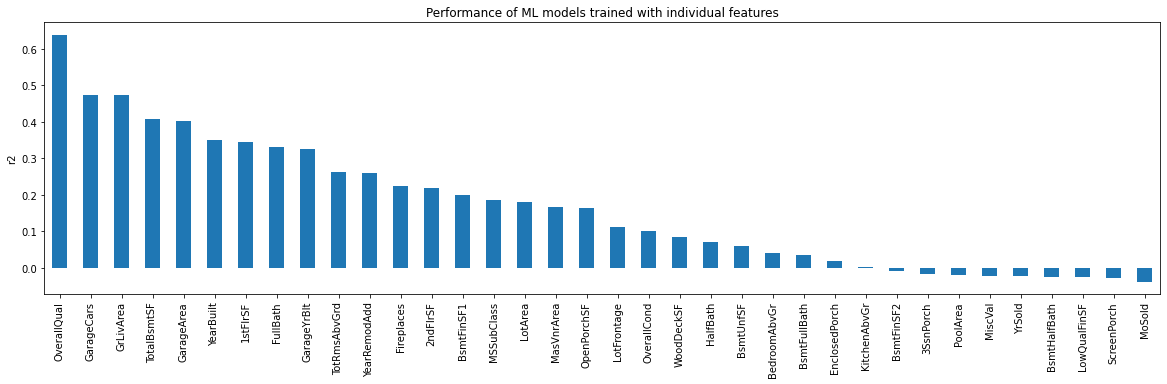

In [18]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

Text(0, 0.5, 'r2')

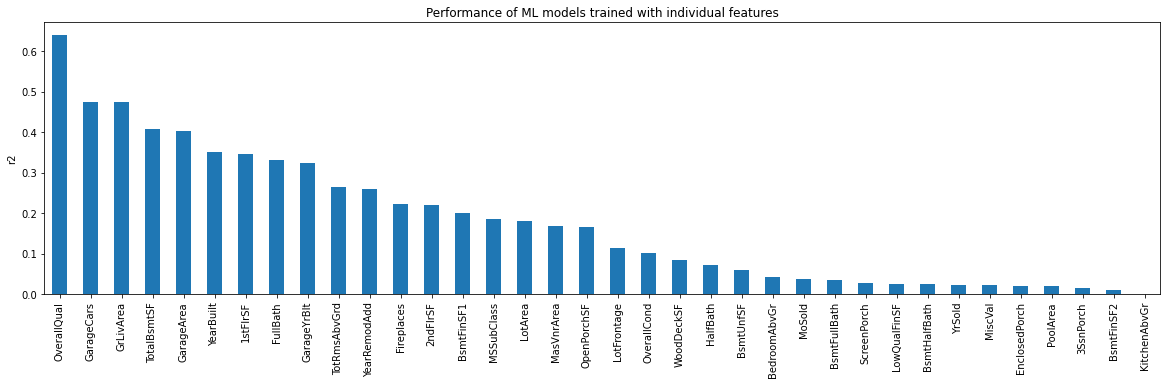

In [21]:
# same plot but taking the absolute value of the r2

np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

In [22]:
# features to drop
sel.features_to_drop_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [23]:
len(sel.features_to_drop_)

35

In [ ]:
# remove the features to drop

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)